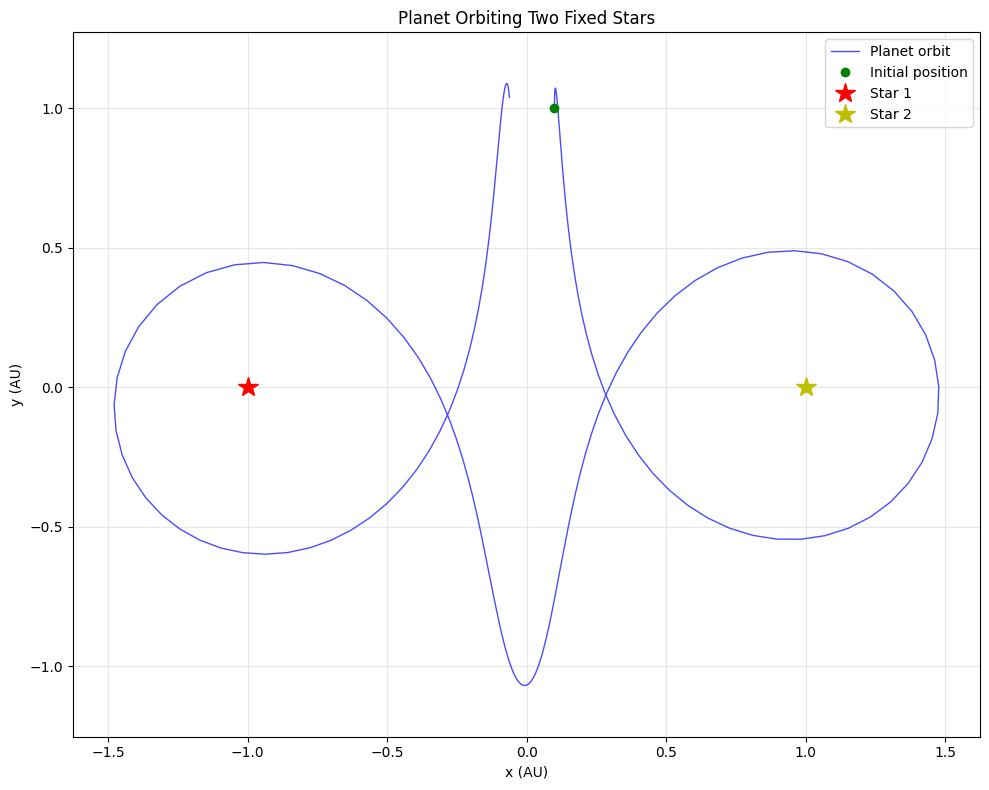

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from ode_solver import *

def n_body_fixed_stars(t, x, p):
    """
    Modified n_body function that keeps the first two bodies (stars) fixed.
    """
    # Extract parameters
    masses = np.array(p['m'])
    G = p['G']
    dimensions = p['dimension']
    n_bodies = len(masses)

    # Initialize derivative vector
    dxdt = np.zeros_like(x)

    # First half of dxdt is just the velocities from second half of x
    dxdt[:n_bodies*dimensions] = x[n_bodies*dimensions:]

    # Initialize force matrices for each dimension
    force_matrices = np.zeros((dimensions, n_bodies, n_bodies))

    # Calculate forces between all pairs of bodies
    for i in range(n_bodies):
        for j in range(i+1, n_bodies):  # Only upper triangle
            # Calculate displacement vector between bodies i and j
            r_ij = []  # x, y
            for d in range(dimensions):
                displacement = x[i*dimensions + d] - x[j*dimensions + d]
                r_ij.append(displacement)

            r_ij = np.array(r_ij)  # x, y displacement

            # Calculate distance
            r = np.sqrt(np.sum(r_ij**2))

            # Calculate gravitational force magnitude
            force_mag = -G * masses[i] * masses[j] / (r**3)

            # Calculate force components and fill force matrices
            for d in range(dimensions):
                force_matrices[d][i,j] = force_mag * r_ij[d]
                force_matrices[d][j,i] = -force_matrices[d][i,j]  # Fill in lower triangle

    # Sum forces on each body and calculate accelerations
    for i in range(n_bodies):
        # Skip the first two bodies (stars) - they remain fixed
        if i < 2:
            continue

        # Calculate acceleration components for each dimension
        for d in range(dimensions):
            total_force = np.sum(force_matrices[d][i])
            dxdt[n_bodies*dimensions + i*dimensions + d] = total_force / masses[i]

    return dxdt

# Simulation parameters
tspan = [0, 2]  # time span in years
dt = 0.01  # time step in years
G = 4 * np.pi**2  # gravitational constant in AU^3/yr^2

# Initialize positions and velocities
# x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3
y0 = np.zeros(12)

# Star positions (fixed)
y0[0] = -1.0  # x1 (first star)
y0[1] = 0.0   # y1
y0[2] = 1.0   # x2 (second star)
y0[3] = 0.0   # y2

# Planet initial position
y0[4] = 0.1   # x3 (planet)
y0[5] = 1.0   # y3

# Star velocities (zero since they're fixed)
y0[6] = 0.0   # vx1
y0[7] = 0.0   # vy1
y0[8] = 0.0   # vx2
y0[9] = 0.0   # vy2

# Planet initial velocity
y0[10] = 0.0   # vx3
y0[11] = 2.0   # vy3

# Parameters dictionary
p = {
    'G': G,
    'm': [1.0, 1.0, 0.001],  # masses of two stars and planet
    'dimension': 2
}

# Solve the ODE
t, y = solve_ode(n_body_fixed_stars, tspan, y0, EulerRichardson, p, first_step=dt)

# Plot the orbit
plt.figure(figsize=(10, 8))

# Plot the planet's orbit
plt.plot(y[:, 4], y[:, 5], 'b-', linewidth=1, alpha=0.7, label='Planet orbit')

# Mark initial position
plt.plot(y[0, 4], y[0, 5], 'go', markersize=6, label='Initial position')

# Plot stars
plt.plot(y[0, 0], y[0, 1], 'r*', markersize=15, label='Star 1')
plt.plot(y[0, 2], y[0, 3], 'y*', markersize=15, label='Star 2')

# Set labels and title
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Planet Orbiting Two Fixed Stars')

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# Equal aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()